# The IMDB dataset

Two-class classification, or binary classification, may be the most widely applied kind of
machine-learning  problem.  In  this  example,  you’ll  learn  to  classify  movie  reviews  as
positive or negative, based on the text content of the reviews.

The IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet  Movie  Database.  They’re  split  into  25,000  reviews  for  training  and  25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [1]:
from keras.datasets import imdb
#Import required packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import ipdb # deb

Using TensorFlow backend.


In [20]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    path="imdb.npz", num_words=10000, skip_top=0,
    maxlen=None, seed=113, start_char=1, oov_char=2,index_from=3)

In [22]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [24]:
type(train_data[0])

list

The argument $num\_words=1000$ means  you’ll  only  keep  the  top  $10,000$  most frequently  occurring  words  in  the  training  data.  Rare  words  will  be  discarded.  This allows you to work with vector data of manageable size.

In [25]:
#Explore the data structure using basic python commands
print("Type of the Dataset:",type(train_data))
print("Shape of training data :",train_data.shape)
print("Shape of training labels :",train_labels.shape)
print("Shape of testing data :",test_data)
print("Shape of testing labels :",test_labels.shape)

Type of the Dataset: <class 'numpy.ndarray'>
Shape of training data : (25000,)
Shape of training labels : (25000,)
Shape of testing data : <class 'numpy.ndarray'>
Shape of testing labels : (25000,)


In [26]:
print("Number of unique value in the training label : ", np.unique(train_labels))
print("Number of unique value in the testing label : ", np.unique(test_labels))

Number of unique value in the training label :  [0 1]
Number of unique value in the testing label :  [0 1]


Train_labels and Test_labels are arrays of $0s$ and $1s$, where $0$ stands for **negative** and $1$ stands for **positive**.

Because we restricted ourself to the top $10,000$ most frequent words, no word
index will exceed 10,000:

In [27]:
max([max(sequence) for sequence in train_data])

9999

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.

How we can quickly decode one of these reviews back to English words:

In [28]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are
# reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [29]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [30]:
# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are
# reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

We can’t feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways to do this :

1. Pad the lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer).
2. One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.

In [31]:
type(train_data[0])

list

In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  #; ipdb.set_trace()
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [33]:
x_train[10000]

array([0., 1., 1., ..., 0., 0., 0.])

In [44]:
train_data[1000][:10]

[1, 261, 13, 69, 110, 2, 11, 6, 750, 96]

Let vectorize the label as well (changing it from int to float)

In [54]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [52]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [53]:
y_train_[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

### Building our model

In [117]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [118]:
from keras import losses
from keras import metrics
from keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

Let create a falidation set, just to see how our model perform after each epoch 

In [119]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [123]:
partial_x_train.shape

(15000, 10000)

In [135]:
model.compile(optimizer=optimizers.Adam(lr=0.1),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 247us/step - loss: 1.4057 - acc: 0.7852 - val_loss: 0.4537 - val_acc: 0.8569
Epoch 2/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.2133 - acc: 0.9185 - val_loss: 0.3230 - val_acc: 0.8731
Epoch 3/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.1146 - acc: 0.9571 - val_loss: 0.4652 - val_acc: 0.8688
Epoch 4/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.0777 - acc: 0.9691 - val_loss: 0.5959 - val_acc: 0.8645
Epoch 5/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.0567 - acc: 0.9764 - val_loss: 0.7963 - val_acc: 0.8660
Epoch 6/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.0616 - acc: 0.9757 - val_loss: 0.6804 - val_acc: 0.8621
Epoch 7/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.0600 - acc: 0.9755 - val_loss: 0.6618 - 

 Note that the call to model.fit() returns a History object. This object has a mem-
ber history, which is a dictionary containing data about everything that happened
during training.

In [136]:
history_dict = model.history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [137]:
history_dict['acc']

[0.7852000001907349,
 0.9185333332061768,
 0.9570666666348775,
 0.9690666668256124,
 0.9764000001589457,
 0.9757333334922791,
 0.9754666665395101,
 0.9770000000635782,
 0.9789333330472311,
 0.9789333331425984,
 0.9788666664759318,
 0.9834000002543132,
 0.9849999998092651,
 0.9825333331425985,
 0.9795333335876465,
 0.9815333331425985,
 0.9803333335876465,
 0.985133333492279,
 0.9872666666666666,
 0.9870666665712993]

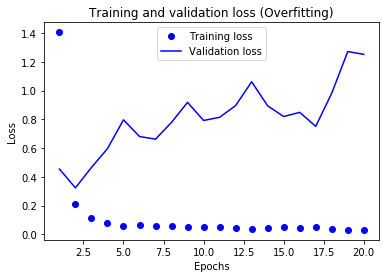

In [139]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# acc =10
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss (Overfitting)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

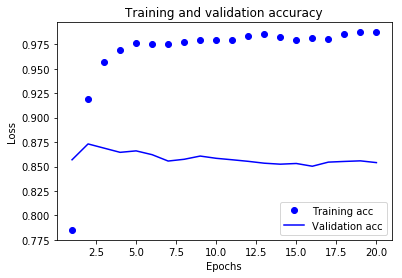

In [140]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

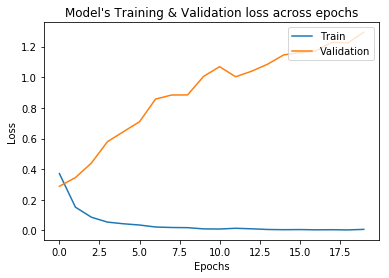

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [141]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 32s 1ms/step


In [147]:
for i in range(len(model.metrics_names)):
     print("Metric",model.metrics_names[i],":", str(round(results[i],2)*100),"%")

Metric loss : 138.0 %
Metric acc : 84.0 %


### Using our trained network

After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive or not

In [148]:
model.predict(x_test)

array([[4.2825937e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [8.9406967e-08],
       [2.0861626e-07],
       [9.9997413e-01]], dtype=float32)